In [1]:
## ref: https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda/notebook

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

In [13]:
import warnings            
warnings.filterwarnings("ignore")

In [8]:
import os
os.listdir('../Time Series Prediction with EDA/data')

['operations.csv.zip',
 'Weather Station Locations.csv',
 'Summary of Weather.csv']

In [7]:
os.getcwd()

'/Users/sulbha/Desktop/Python_Files/Python-Data-Science-and-Machine-Learning-Bootcamp/Sul Practise/Time Series Prediction with EDA'

In [10]:
plt.style.use('ggplot')

In [14]:
# bombing data
aerial = pd.read_csv("../Time Series Prediction with EDA/data/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("../Time Series Prediction with EDA/data/Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("../Time Series Prediction with EDA/data/Summary of Weather.csv")

In [15]:
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [18]:
aerial.dtypes

Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           object
Target Latitude                          float64
Target Longitude    

In [19]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
Mission ID                               178281 non-null int64
Mission Date                             178281 non-null object
Theater of Operations                    175123 non-null object
Country                                  126494 non-null object
Air Force                                126444 non-null object
Unit ID                                  50913 non-null object
Aircraft Series                          178165 non-null object
Callsign                                 21 non-null object
Mission Type                             47186 non-null object
Takeoff Base                             3383 non-null object
Takeoff Location                         3338 non-null object
Takeoff Latitude                         2981 non-null object
Takeoff Longitude                        2980 non-null float64
Target ID                                127406 non-null object
Target 

In [20]:
aerial.describe()

,Mission ID,Takeoff Longitude,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,...,High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Source ID
count,178281.000000,2980.000000,169565.000000,169543.000000,120826.000000,82242.000000,125108.000000,81612.000000,133.000000,247.000000,...,146201.000000,3283.000000,356.000000,25732.000000,5768.000000,194.000000,16902.000000,2.119000e+03,166508.000000,174236.000000
mean,89414.547041,220.618627,38.067793,43.340213,139.026812,12.329771,10.218899,12.347486,2.157895,4.275304,...,23.911995,132.001965,19962.732022,21.527213,102.684560,2065.630928,12.017136,1.237718e+04,25.760326,152670.902322
std,51649.744549,454.046956,18.711405,59.681160,186.818278,12.514833,11.246399,12.573549,1.369816,5.924758,...,90.092020,498.596761,45331.714255,66.692639,158.941650,2424.138566,27.221410,2.064155e+05,90.643876,105544.795936
min,1.000000,-177.328611,-37.416667,-179.451285,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,44571.000000,14.400000,26.250000,7.620000,70.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,7.000000,218.750000,1.000000,10.000000,598.400000,1.000000,2.100000e+03,2.000000,53476.500000
50%,89540.000000,29.851389,47.500000,11.330000,122.000000,11.000000,7.000000,11.000000,2.000000,2.000000,...,9.000000,14.000000,2640.000000,6.000000,38.461538,1500.000000,3.000000,5.200000e+03,9.290000,167604.500000
75%,134171.000000,96.133222,50.930000,97.400000,223.000000,17.000000,12.000000,18.000000,3.000000,4.000000,...,30.000000,32.000000,12500.000000,18.000000,133.333333,2400.000000,12.000000,1.080000e+04,31.000000,211284.250000
max,178742.000000,1355.000000,1108.000000,1000.650000,40000.000000,332.000000,332.000000,332.000000,7.000000,48.000000,...,20000.000000,4875.000000,420000.000000,999.000000,3000.000000,20640.000000,900.000000,9.500000e+06,20000.000000,699625.000000


In [25]:
## drop country wherever NA
aerial = aerial[aerial.loc[:,'Country'].notnull()]
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [26]:
## drop where Target Longitude is null
aerial = aerial[aerial['Target Longitude'].notnull()]
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [27]:
## drop whre takeoff Longitude is null
aerial = aerial[aerial['Takeoff Longitude'].notnull()]
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
8,9,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9,10,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [28]:
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial.head()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90


In [33]:
#aerial[aerial.iloc[:,8]=="4248"]
#aerial[aerial.iloc[:,9]=="1355"]

In [34]:
## weather info

weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [35]:
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [36]:
aerial['Country'].unique()

array(['USA', 'GREAT BRITAIN', 'NEW ZEALAND', 'SOUTH AFRICA'],
      dtype=object)

In [37]:
aerial['Country'].value_counts()

USA              1895
GREAT BRITAIN     931
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64

In [38]:
aerial['Country'].nunique()

4

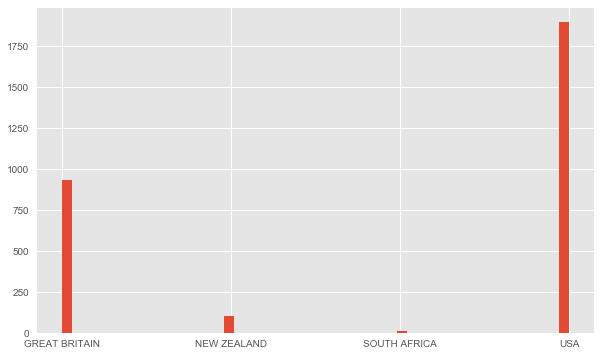

In [44]:
plt.figure(figsize=(10,6))
aerial['Country'].hist(bins =50)

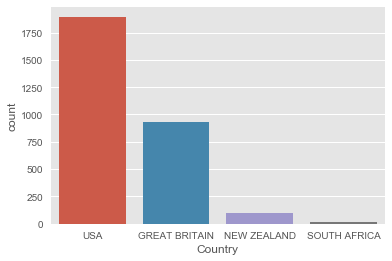

In [46]:
sns.countplot(x='Country', data=aerial)

In [53]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

A36             990
LIB             532
B25             416
B24             337
BLEN            180
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


In [50]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

MTO            1991
CBI             425
PTO             247
ETO              63
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


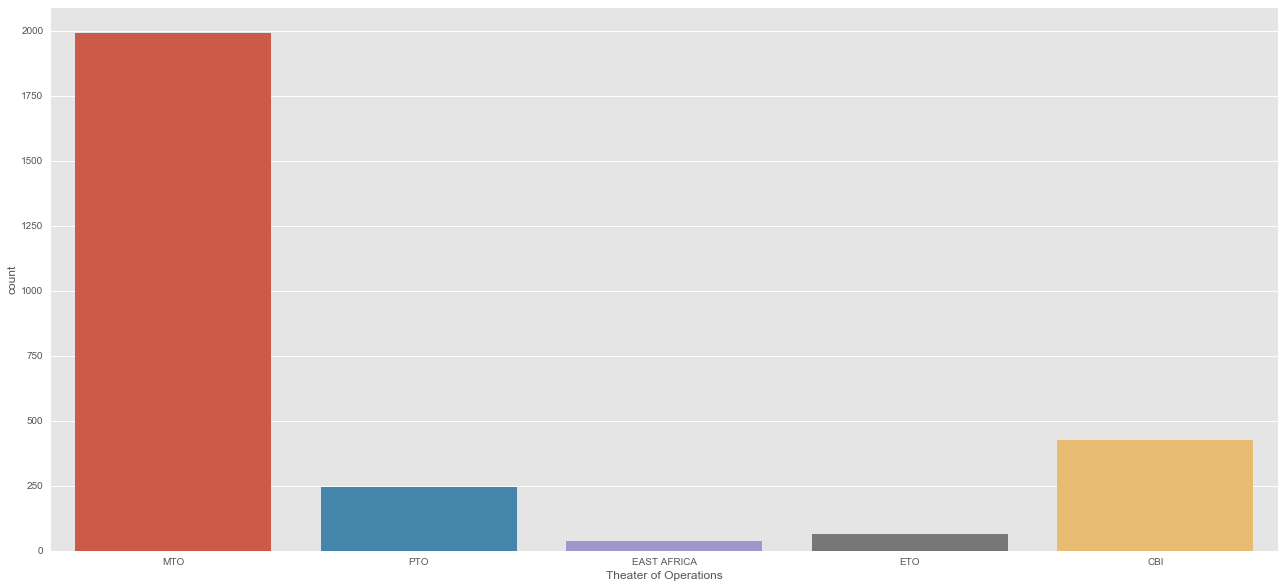

In [61]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

In [64]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)



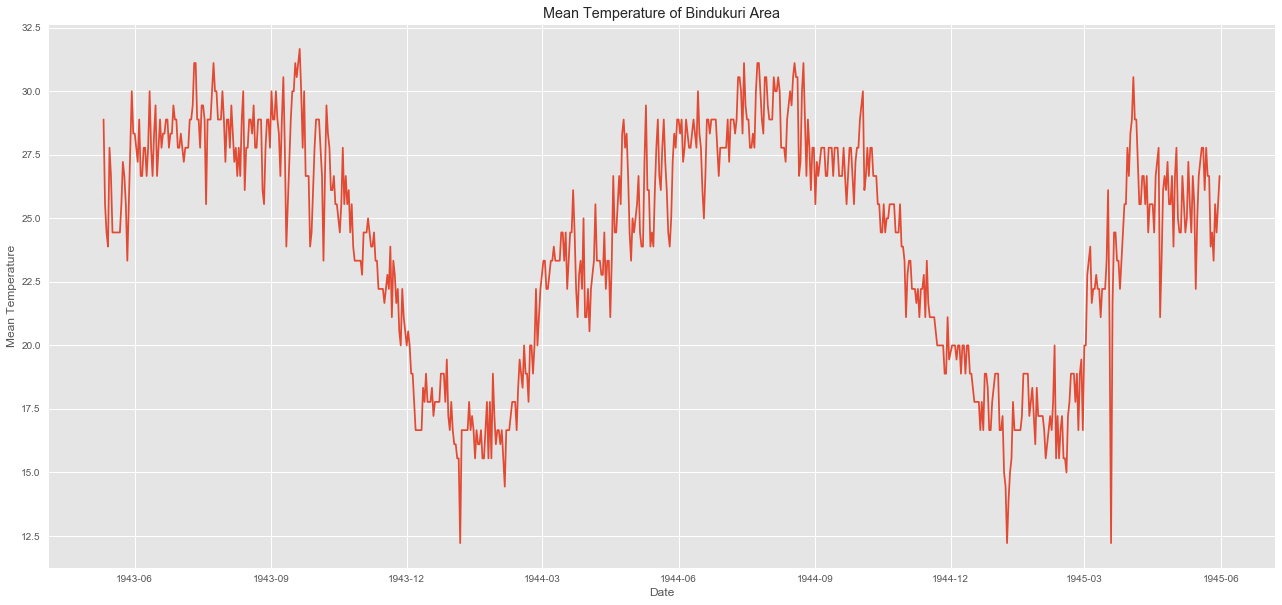

In [63]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [65]:
# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

In [66]:
## As you can see from plot above, our time series has seasonal variation. In summer, mean temperature is higher and in winter mean temperature is lower for each year.
## Now lets check stationary of time series. We can check stationarity using the following methods:
## Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
## Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.

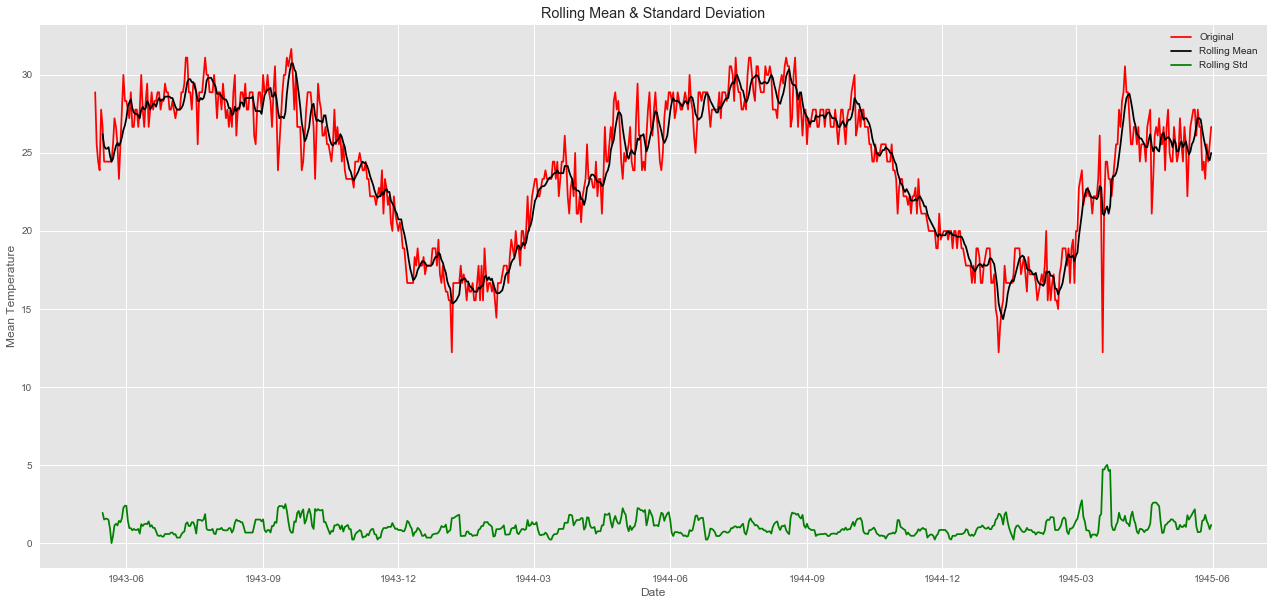

Test statistic:  -1.4095966745887762
p-value:  0.5776668028526354
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [67]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
Second one is constant variance. It looks like constant. (yes stationary)
Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (no stationary)
As a result, we sure that our time series is not stationary.
Lets make time series stationary at the next part.

Make a Time Series Stationary?
As we mentioned before, there are 2 reasons behind non-stationarity of time series
Trend: varying mean over time. We need constant mean for stationary of time series.
Seasonality: variations at specific time. We need constant variations for stationary of time series.
First solve trend(constant mean) problem
Most popular method is moving average.
Moving average: We have window that take the average over the past 'n' sample. 'n' is window size.

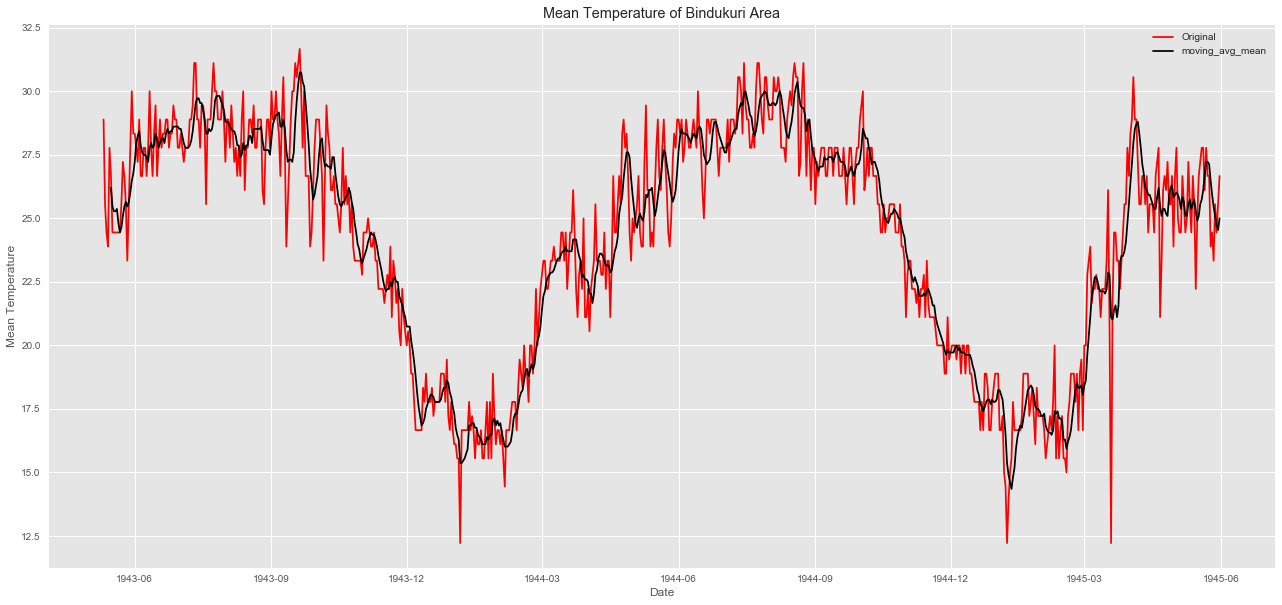

In [68]:
# Moving average method
window_size = 6
moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

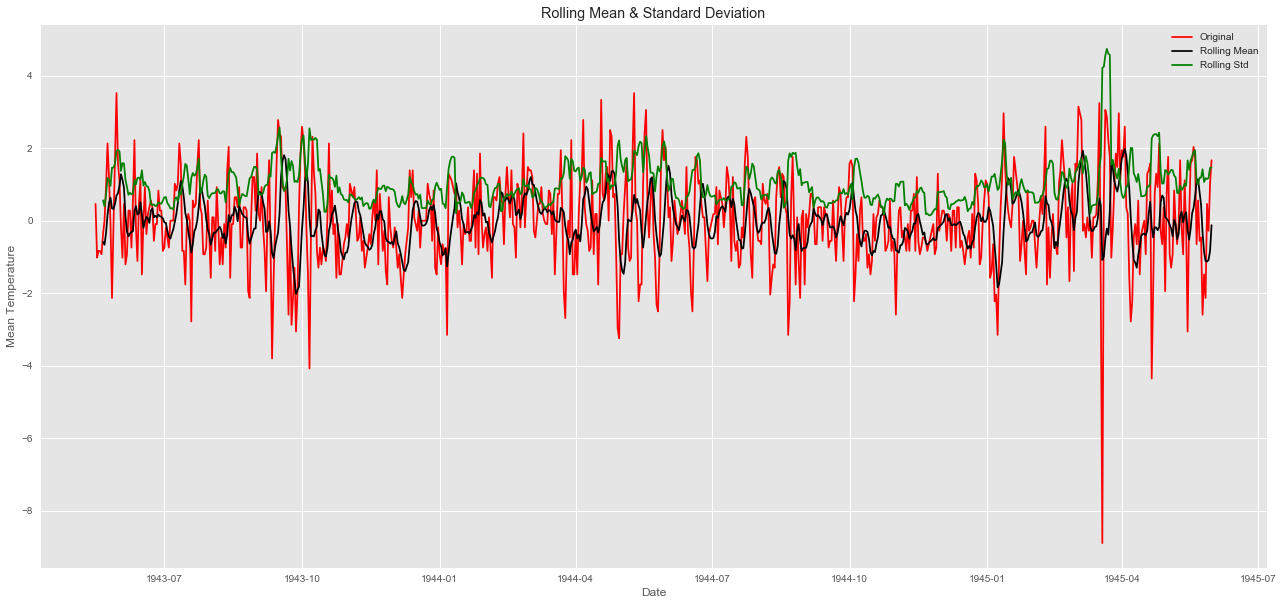

Test statistic:  -11.138514335138476
p-value:  3.150868563164562e-20
Critical Values: {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


In [69]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
Second one is constant variance. It looks like constant. (yes stationary)
The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)
We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.
Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

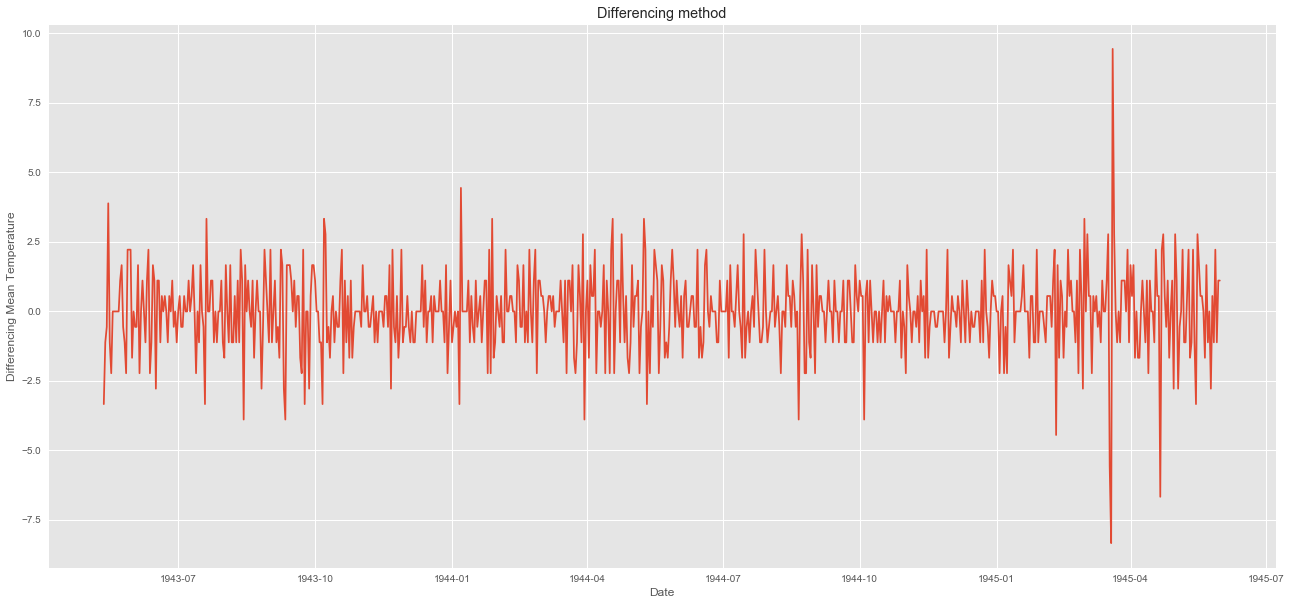

In [70]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

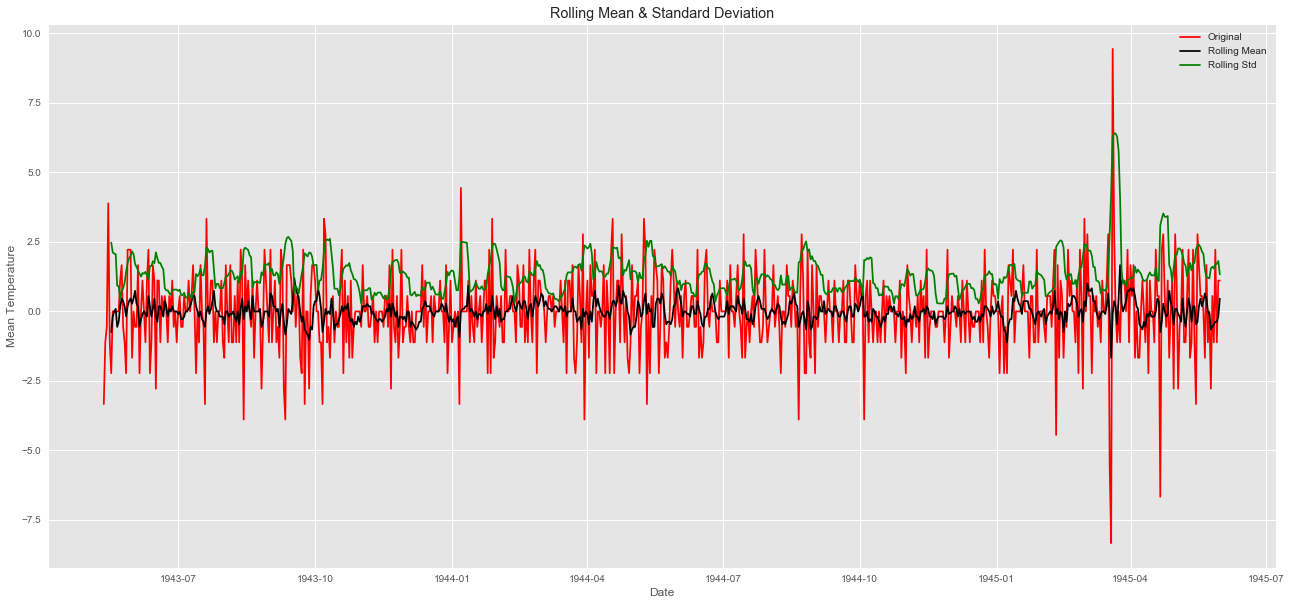

Test statistic:  -11.678955575105368
p-value:  1.7602075693559596e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [71]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
Second one is constant variance. It looks like constant. (yes stationary)
The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)


### Forecasting a Time Series
We learn two different methodsthat are moving average and differencing methods to avoid trend and seasonality problem
For prediction(forecasting) we will use ts_diff time series that is result of differencing method. There is no reason I only choose it.
Also prediction method is ARIMA that is Auto-Regressive Integrated Moving Averages.
AR: Auto-Regressive (p): AR terms are just lags of dependent variable. For example lets say p is 3, we will use x(t-1), x(t-2) and x(t-3) to predict x(t)
I: Integrated (d): These are the number of nonseasonal differences. For example, in our case we take the first order difference. So we pass that variable and put d=0
MA: Moving Averages (q): MA terms are lagged forecast errors in prediction equation.
(p,d,q) is parameters of ARIMA model.
In order to choose p,d,q parameters we will use two different plots.
Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.
Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.

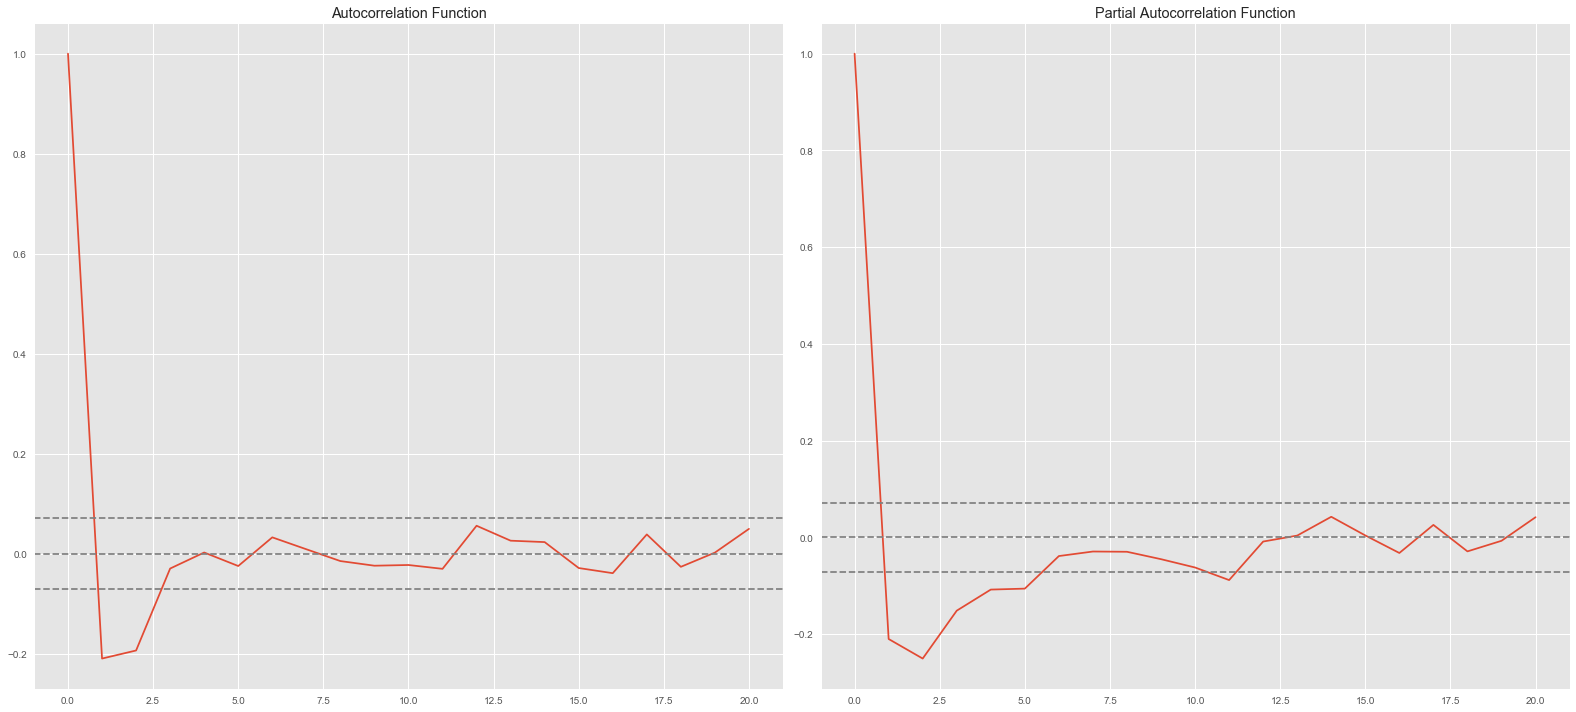

In [72]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.
Now lets use (1,0,1) as parameters of ARIMA models and predict
ARIMA: from statsmodels libarary
datetime: we will use it start and end indexes of predict method


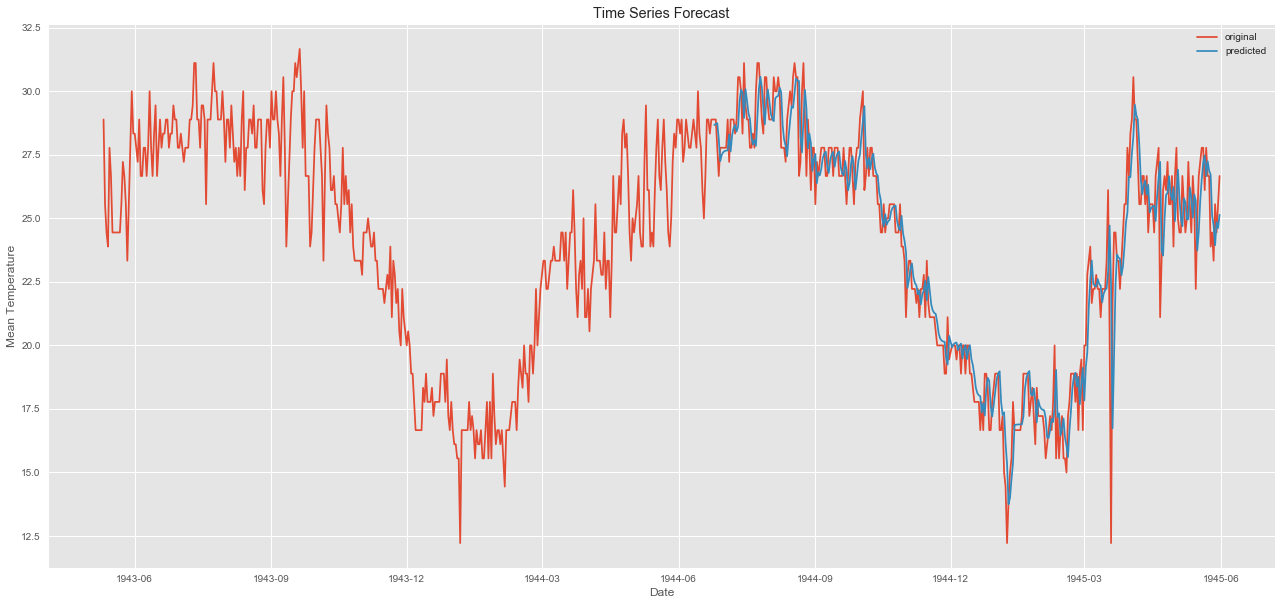

In [73]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

error:  1.8625820321821276


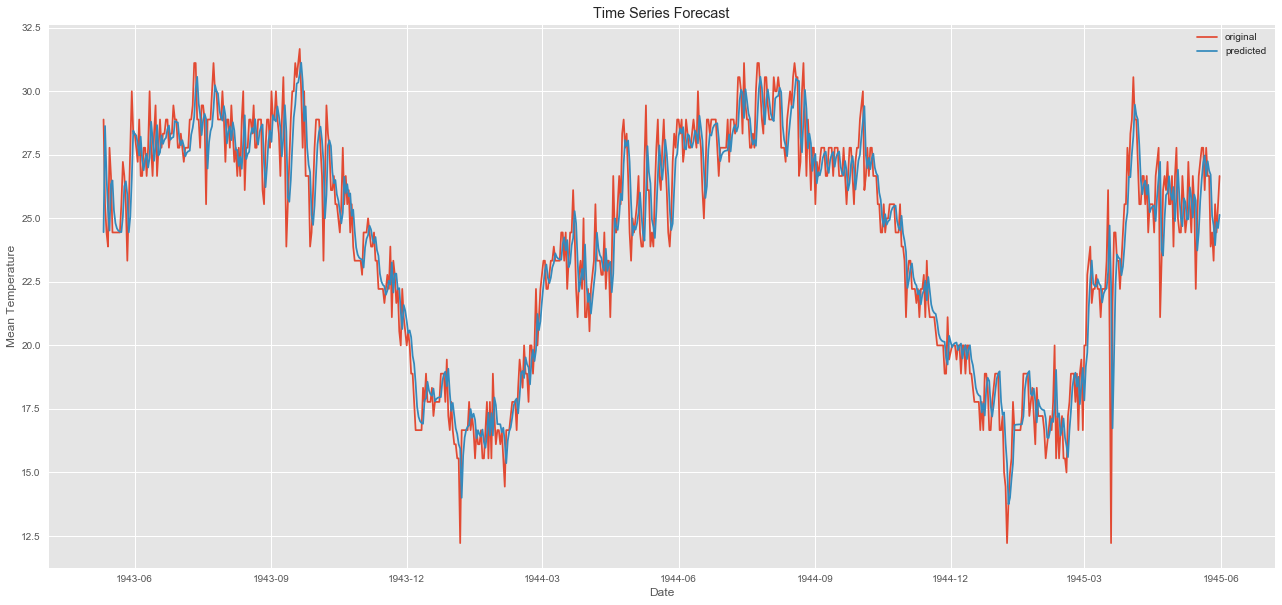

In [74]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()